In [1]:
!git clone https://github.com/X-PLUG/mPLUG-Owl.git

fatal: destination path 'mPLUG-Owl' already exists and is not an empty directory.


In [2]:
!pwd

/kaggle/working


In [3]:
import sys
sys.path.append('/kaggle/working/mPLUG-Owl/mPLUG-Owl2')

In [4]:
!pip install --upgrade pip
!pip install icecream accelerate

In [5]:
!pip install -e /kaggle/working/mPLUG-Owl/mPLUG-Owl2

Obtaining file:///kaggle/working/mPLUG-Owl/mPLUG-Owl2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mplug_owl2 (pyproject.toml) ... done
  Created wheel for mplug_owl2: filename=mplug_owl2-1.0.0-0.editable-py3-none-any.whl size=9528 sha256=e7173498cf5a5bdcd3499b0d8f117372aab1147e5e597cb0db451438b3b36312
  Stored in directory: /tmp/pip-ephem-wheel-cache-41zus8lp/wheels/9f/75/99/e2f58f7801bc71d8dc728b8fcd307de85e4906a0a02c42cf69
Successfully built mplug_owl2
  Attempting uninstall: mplug_owl2
    Found existing installation: mplug_owl2 1.0.0
    Uninstalling mplug_owl2-1.0.0:
      Successfully uninstalled mplug_owl2-1.0.0


In [6]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from transformers import TextStreamer
from transformers import AutoModel


from mplug_owl2.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from mplug_owl2.conversation import conv_templates, SeparatorStyle
from mplug_owl2.model.builder import load_pretrained_model
from mplug_owl2.mm_utils import process_images, tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria

2024-06-24 08:25:45.138916: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 08:25:45.138970: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 08:25:45.140554: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
# !pip install mplug_owl2


In [8]:
from io import BytesIO
import requests


In [9]:
model_path = 'MAGAer13/mplug-owl2-llama2-7b'
device = 'cpu'
if torch.cuda.is_available():
    device = torch.device("cuda")
device

device(type='cuda')

In [10]:
pip install sentencepiece


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [11]:
model_name = get_model_name_from_path(model_path)

#  GPU
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=False, device="cuda") # model ~14GB/15GB in GPU
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=True, load_4bit=False, device="cuda") #~8GB
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=True, device="cuda") # ~5 GB



/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/5.05k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/77.4k [00:00<?, ?B/s]

pytorch_model-1-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-10-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-11-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-12-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-13-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-14-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-15-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-16-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-17-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-18-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-19-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-2-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-20-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-21-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-22-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-23-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-24-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-25-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-26-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-27-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-28-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-29-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-3-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-30-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-31-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-32-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-33-of-33.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

pytorch_model-4-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-5-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-6-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-7-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-8-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-9-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

Some weights of MPLUGOwl2LlamaForCausalLM were not initialized from the model checkpoint at MAGAer13/mplug-owl2-llama2-7b and are newly initialized: ['model.visual_abstractor.encoder.layers.4.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.5.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.4.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.1.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.2.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.2.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.5.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.3.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.0.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.1.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.

generation_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

In [22]:
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

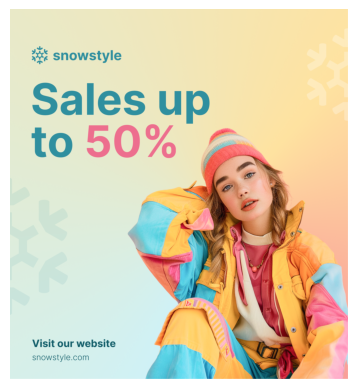

In [23]:
# url = "We'll enter the Github url of the image when we submit this"
# response = requests.get(url)
# img = Image.open(BytesIO(response.content))
# plt.imshow(img)

import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the image file
file_path = '/kaggle/input/testdata/image1.png'

# Open the image file
img = Image.open(file_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


In [24]:
query = "Describe the image."

In [25]:
conv = conv_templates["mplug_owl2"].copy()
roles = conv.roles

# image = Image.open(image_file).convert('RGB')
image = img
max_edge = max(image.size) # We recommand you to resize to squared image for BEST performance.
image = image.resize((max_edge, max_edge))

image_tensor = process_images([image], image_processor)
image_tensor = image_tensor.to(model.device, dtype=torch.float16)

inp = DEFAULT_IMAGE_TOKEN + query
conv.append_message(conv.roles[0], inp)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
stop_str = conv.sep2
keywords = [stop_str]
stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)


In [26]:
image_tensor.shape

torch.Size([1, 3, 448, 448])

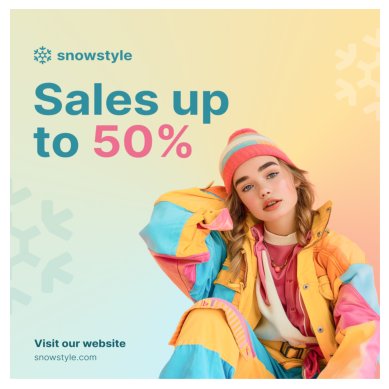

In [27]:
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:

temperature = 0.7
max_new_tokens = 512

with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=temperature,
        max_new_tokens=max_new_tokens,
        streamer=streamer,
        use_cache=True,
        stopping_criteria=[stopping_criteria])

outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
print(outputs)

In [29]:

def predict(query, PIL_img, image_file = None):
    conv = conv_templates["mplug_owl2"].copy()
    roles = conv.roles

    if image_file:
        image = Image.open(image_file).convert('RGB') # When path is provided
    else:
        image = PIL_img

    max_edge = max(image.size) # We recommand you to resize to squared image for BEST performance.
    image = image.resize((max_edge, max_edge))

    image_tensor = process_images([image], image_processor)
    image_tensor = image_tensor.to(model.device, dtype=torch.float16)

    inp = DEFAULT_IMAGE_TOKEN + query
    conv.append_message(conv.roles[0], inp)
    conv.append_message(conv.roles[1], None)
    prompt = conv.get_prompt()

    input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
    stop_str = conv.sep2
    keywords = [stop_str]
    stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
    streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)


    temperature = 0.7
    max_new_tokens = 150

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=image_tensor,
            do_sample=True,
            temperature=temperature,
            max_new_tokens=max_new_tokens,
            streamer=streamer,
            use_cache=False,
            stopping_criteria=[stopping_criteria],
            pad_token_id=tokenizer.pad_token_id)

    outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
      #print(outputs)

def show_img(PIL_image):
    plt.imshow(PIL_image)
    plt.axis('off')  # Hide the axis
    plt.show()


describe key elements of advert (product, brand, CTA, etc.) and also identify purpose of advert (brand building or conversion).


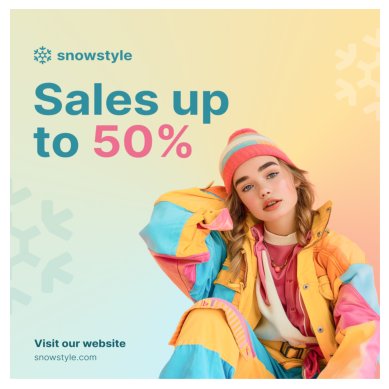

The advert features a woman wearing a colorful coat, which serves as a representation of the product being sold. The brand is Snowstyle, and the purpose of the advert is for brand building and conversion. The text encourages potential customers to visit their website at snowstyle.com.


In [30]:
query = "describe key elements of advert (product, brand, CTA, etc.) and also identify purpose of advert (brand building or conversion)."

print(query)
show_img(image)
predict(query, image)

In [31]:
# Specify the path to the image file
file_path = '/kaggle/input/testdata/image1_heatmap.jpeg'

# Open the image file
image1_hm = Image.open(file_path)


Provided the attention heatmap of an ad and describe the most visually salient elements of the ad based on the heatmap.


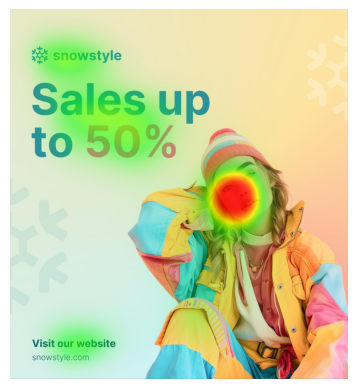

The ad contains several visually salient elements, including a woman holding a snowflake, a woman wearing a yellow hat, and the word "sales." The text "up to 50%" is also prominently displayed, attracting the viewer's attention. The ad features a warm-up suit and encourages visitors to visit their website. The woman's face stands out in the image, making her the main focus of the ad and inviting the viewer to engage with the content.


In [35]:
query = "Provided the attention heatmap of an ad and describe the most visually salient elements of the ad based on the heatmap."
print(query)
show_img(image1_hm)
predict(query, image1_hm)

assess perceptual/cognitive load of the asset in the picture.What is Cognitive Load Theory? Cognitive Load Theory is based on the model of human information processing illustrated below. This model  describes memory as having three main parts: sensory, working, and long-term. Sensory memory filters out most of  what is going on around us, passing select information on to our working memory for additional processing.  Working memory can typically process 5-9  pieces, or chunks, of information at any given time. Our working memory either discards the information or categorizes it for storing in our long-term memory. Long-term memory stores information in structures called “schemas,” which organize information based on how we use it. The more we use these schemas, the more developed they become and the easier it is to recall them. Cognitive load refers to the amount of information our working memory can process at any given time. For educational purposes, cognitive load theory helps us to

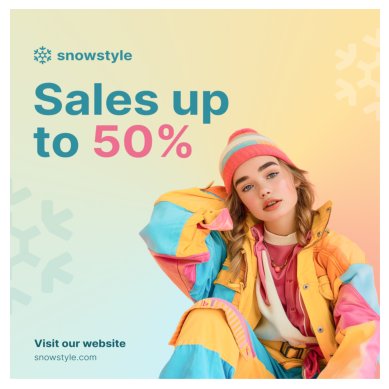

The image features a woman in snow gear with a quote that says "sales up to 50%". The quote is likely related to a sales promotion or offer, and the woman is likely the customer or the promoter of the sales. The image's content is focused on a sales event or offer, which is related to the concept of cognitive load, as the quote might be trying to attract attention or encourage the viewer to consider purchasing the product.


In [36]:
query = "assess perceptual/cognitive load of the asset in the picture.What is Cognitive Load Theory? Cognitive Load Theory is based on the model of human information processing illustrated below. This model  describes memory as having three main parts: sensory, working, and long-term. Sensory memory filters out most of  what is going on around us, passing select information on to our working memory for additional processing.  Working memory can typically process 5-9  pieces, or chunks, of information at any given time. Our working memory either discards the information or categorizes it for storing in our long-term memory. Long-term memory stores information in structures called “schemas,” which organize information based on how we use it. The more we use these schemas, the more developed they become and the easier it is to recall them. Cognitive load refers to the amount of information our working memory can process at any given time. For educational purposes, cognitive load theory helps us to avoid overloading learners with more than they can effectively process into schemas for long-term memory storage and future recall."
print(query)
show_img(image)
predict(query, image)

Summarize the results of the answers from earlier prompts for this image. The results are 1. The advert features a woman wearing a colorful coat, which serves as a representation of the product being sold. The brand is Snowstyle, and the purpose of the advert is for brand building and conversion. The text encourages potential customers to visit their website at snowstyle.com. 2. The ad contains several visually salient elements, including a woman holding a snowflake, a woman wearing a yellow hat, and the word sales. The text up to 50% is also prominently displayed, attracting the viewer's attention. The ad features a warm-up suit and encourages visitors to visit their website. The woman's face stands out in the image, making her the main focus of the ad and inviting the viewer to engage with the content. 3. The image features a woman in snow gear with a quote that says sales up to 50%. The quote is likely related to a sales promotion or offer, and the woman is likely the customer or th

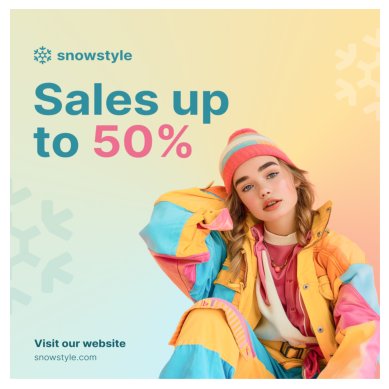

The image is an advertisement for Snowstyle, promoting sales up to 50%. The advertisement features a woman wearing a colorful coat and holding a snowflake, creating a visually appealing and attractive representation of the product. The ad also highlights the brand's website, snowstyle.com, to encourage potential customers to visit and make a purchase. The woman's face is prominently displayed, serving as the focal point of the ad and inviting the viewer to engage with the content. The quote "sales up to 50%" is likely related to a sales promotion or offer, and the woman is likely the customer or the promoter of the


In [39]:
query = "Summarize the results of the answers from earlier prompts for this image. The results are 1. The advert features a woman wearing a colorful coat, which serves as a representation of the product being sold. The brand is Snowstyle, and the purpose of the advert is for brand building and conversion. The text encourages potential customers to visit their website at snowstyle.com. 2. The ad contains several visually salient elements, including a woman holding a snowflake, a woman wearing a yellow hat, and the word sales. The text up to 50% is also prominently displayed, attracting the viewer's attention. The ad features a warm-up suit and encourages visitors to visit their website. The woman's face stands out in the image, making her the main focus of the ad and inviting the viewer to engage with the content. 3. The image features a woman in snow gear with a quote that says sales up to 50%. The quote is likely related to a sales promotion or offer, and the woman is likely the customer or the promoter of the sales. The image's content is focused on a sales event or offer, which is related to the concept of cognitive load, as the quote might be trying to attract attention or encourage the viewer to consider purchasing the product. "
print(query)
show_img(image)
predict(query, image)